In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i+seq_length]
    label = text[i+seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])
X = np.array(sequences)
y = np.array(labels)

X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=100)

start_seq = "This is G"
generated_text = start_seq

for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)
# Calculate evaluation metrics
loss, accuracy = model.evaluate(X_one_hot, y_one_hot)

print("Evaluation Metrics:")
print("Loss:", loss)
print("Accuracy:", accuracy)
start_seq = "This is G"
generated_text = start_seq




Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 2.8824 - accuracy: 0.0208
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 2.8564 - accuracy: 0.0417
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 2.8341 - accuracy: 0.0417
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 2.8129 - accuracy: 0.0417
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 2.7915 - accuracy: 0.0625
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 2.7715 - accuracy: 0.0833
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 2.7522 - accuracy: 0.0833
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 2.7330 - accuracy: 0.1042
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 2.7144 - accuracy: 0.1250
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 2.6945 - accuracy: 0.1458
Epoch 11/100
2/2 [========

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000
              Open         High          Low        Close        Volume
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06
75%     147.688448   148.645373   146.822013   147.688438  1.3

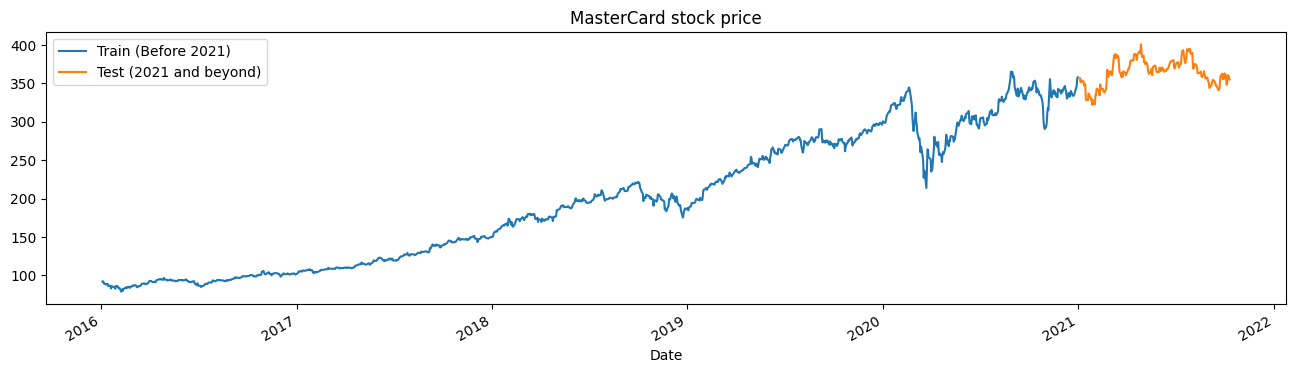

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 125)               63500     
                                                                 
 dense_4 (Dense)             (None, 1)                 126       
                                                                 
Total params: 63626 (248.54 KB)
Trainable params: 63626 (248.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
38/38 [==============================] - 2s 7ms/step - loss: 0.0150
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 6/50
38/38 

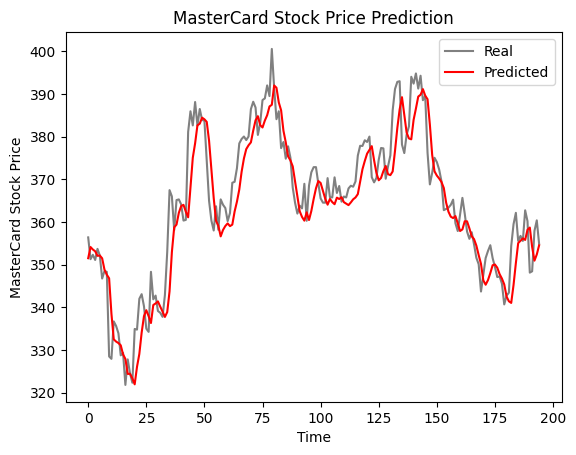

The root mean squared error is 6.63.


In [6]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)
dataset = pd.read_csv(
    "/content/Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)
print(dataset.head())
print(dataset.describe())
dataset.isna().sum()
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()
train_test_plot(dataset,tstart,tend)
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))
plot_predictions(test_set,predicted_stock_price)
return_rmse(test_set,predicted_stock_price)




